<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Detecting-Lane-Lines-on-the-Road" data-toc-modified-id="Detecting-Lane-Lines-on-the-Road-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Detecting Lane Lines on the Road</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><span><a href="#Loading-Test-Images" data-toc-modified-id="Loading-Test-Images-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Loading Test Images</a></span></li></ul></li><li><span><a href="#Yellow-White-RGB-Color-masking" data-toc-modified-id="Yellow-White-RGB-Color-masking-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Yellow-White RGB Color masking</a></span><ul class="toc-item"><li><span><a href="#defining-filter" data-toc-modified-id="defining-filter-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>defining filter</a></span></li><li><span><a href="#filtering-test-images" data-toc-modified-id="filtering-test-images-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>filtering test images</a></span></li></ul></li><li><span><a href="#Canny-Edge-Detection" data-toc-modified-id="Canny-Edge-Detection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Canny Edge Detection</a></span><ul class="toc-item"><li><span><a href="#Gray-Scaling" data-toc-modified-id="Gray-Scaling-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Gray Scaling</a></span></li><li><span><a href="#Gaussian-Smoothing" data-toc-modified-id="Gaussian-Smoothing-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Gaussian Smoothing</a></span></li><li><span><a href="#applying-Smoothing-on-gray-scale-images" data-toc-modified-id="applying-Smoothing-on-gray-scale-images-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>applying Smoothing on gray scale images</a></span></li><li><span><a href="#Edge-Detection" data-toc-modified-id="Edge-Detection-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Edge Detection</a></span></li></ul></li><li><span><a href="#Region-of-Interest-Selection" data-toc-modified-id="Region-of-Interest-Selection-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Region of Interest Selection</a></span></li><li><span><a href="#Hough-Transform-Line-Detection" data-toc-modified-id="Hough-Transform-Line-Detection-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Hough Transform Line Detection</a></span><ul class="toc-item"><li><span><a href="#Averaging-and-Extrapolating-Lines" data-toc-modified-id="Averaging-and-Extrapolating-Lines-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Averaging and Extrapolating Lines</a></span><ul class="toc-item"><li><span><a href="#Lines--&gt;Lanes" data-toc-modified-id="Lines-->Lanes-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Lines -&gt;Lanes</a></span></li></ul></li><li><span><a href="#Redefining-draw_lines-function" data-toc-modified-id="Redefining-draw_lines-function-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Redefining draw_lines function</a></span></li></ul></li><li><span><a href="#Video-Clips" data-toc-modified-id="Video-Clips-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Video Clips</a></span><ul class="toc-item"><li><span><a href="#solidWhiteRight.mp4" data-toc-modified-id="solidWhiteRight.mp4-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>solidWhiteRight.mp4</a></span></li><li><span><a href="#solidYellowLeft.mp4" data-toc-modified-id="solidYellowLeft.mp4-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>solidYellowLeft.mp4</a></span></li><li><span><a href="#challenge.mp4" data-toc-modified-id="challenge.mp4-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>challenge.mp4</a></span></li></ul></li></ul></li></ul></div>

# Detecting Lane Lines on the Road
***



## Preparation 

The following libraries are used.  `cv2` is for OpenCV.

In [1]:
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np
from moviepy.editor import VideoFileClip

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading Test Images

The following `show_image` function is used to display images.

In [2]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

Let's load and examine the test images.

In [3]:
test_images_path = [(path) for path in glob.glob('test_images/*.jpg')]
test_images_path

['test_images\\solidWhiteCurve.jpg',
 'test_images\\solidWhiteRight.jpg',
 'test_images\\solidYellowCurve.jpg',
 'test_images\\solidYellowCurve2.jpg',
 'test_images\\solidYellowLeft.jpg',
 'test_images\\whiteCarLaneSwitch.jpg']

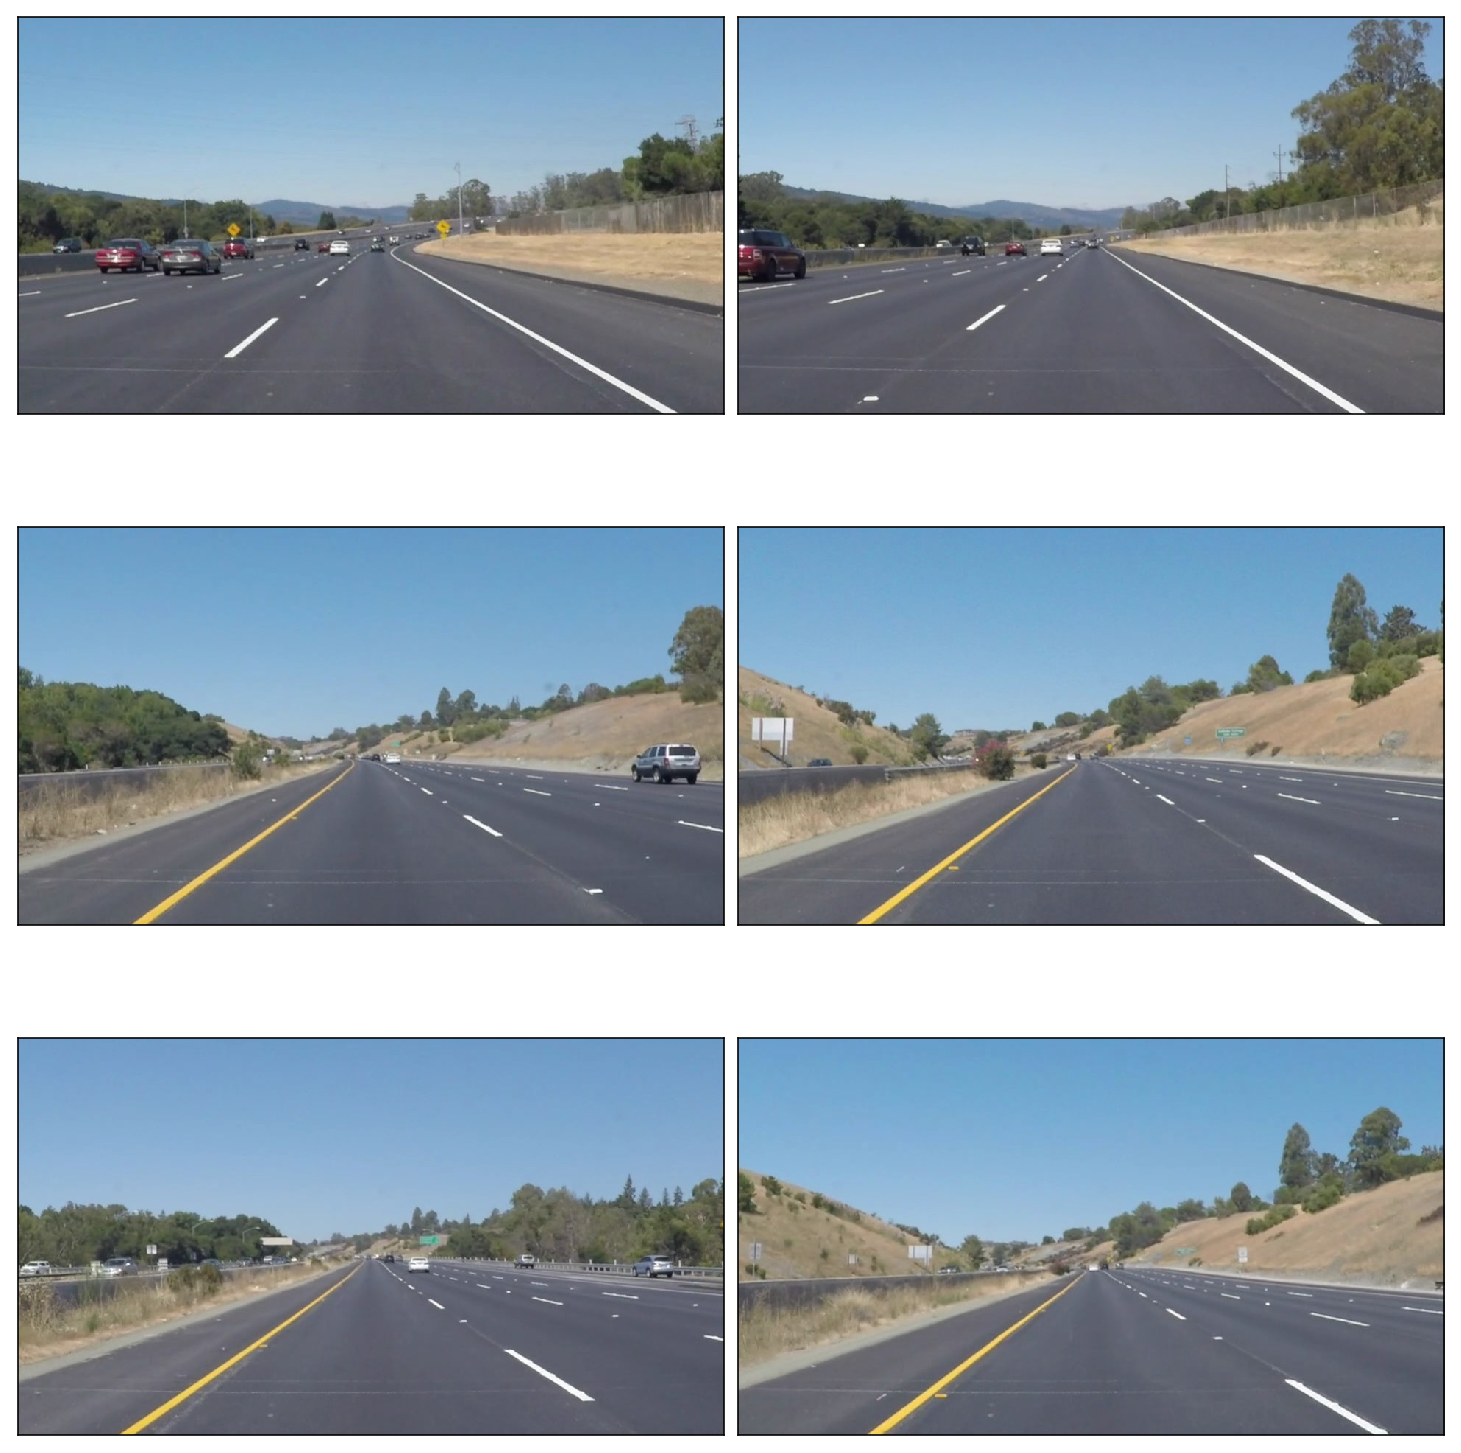

In [4]:
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]

show_images(test_images)



Lines are in white or yellow.  A white lane is a series of alternating dots and short lines, which we need to detect as one line.


## Yellow-White RGB Color masking

Since The images are loaded in RGB color space.  We will use The [RGB Color Code Chart](http://www.rapidtables.com/web/color/RGB_Color.htm) in order to bound the values of each color yellow/white In their RGB channels



### defining filter  

In [5]:
# image is expected be in RGB color space
def select_rgb_white_yellow(image): 
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    #Calculates the per-element bit-wise disjunction of two arrays or an array and a scalar.
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    #Calculates the per-element bit-wise conjunction of two arrays or an array and a scalar.
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked

### filtering test images

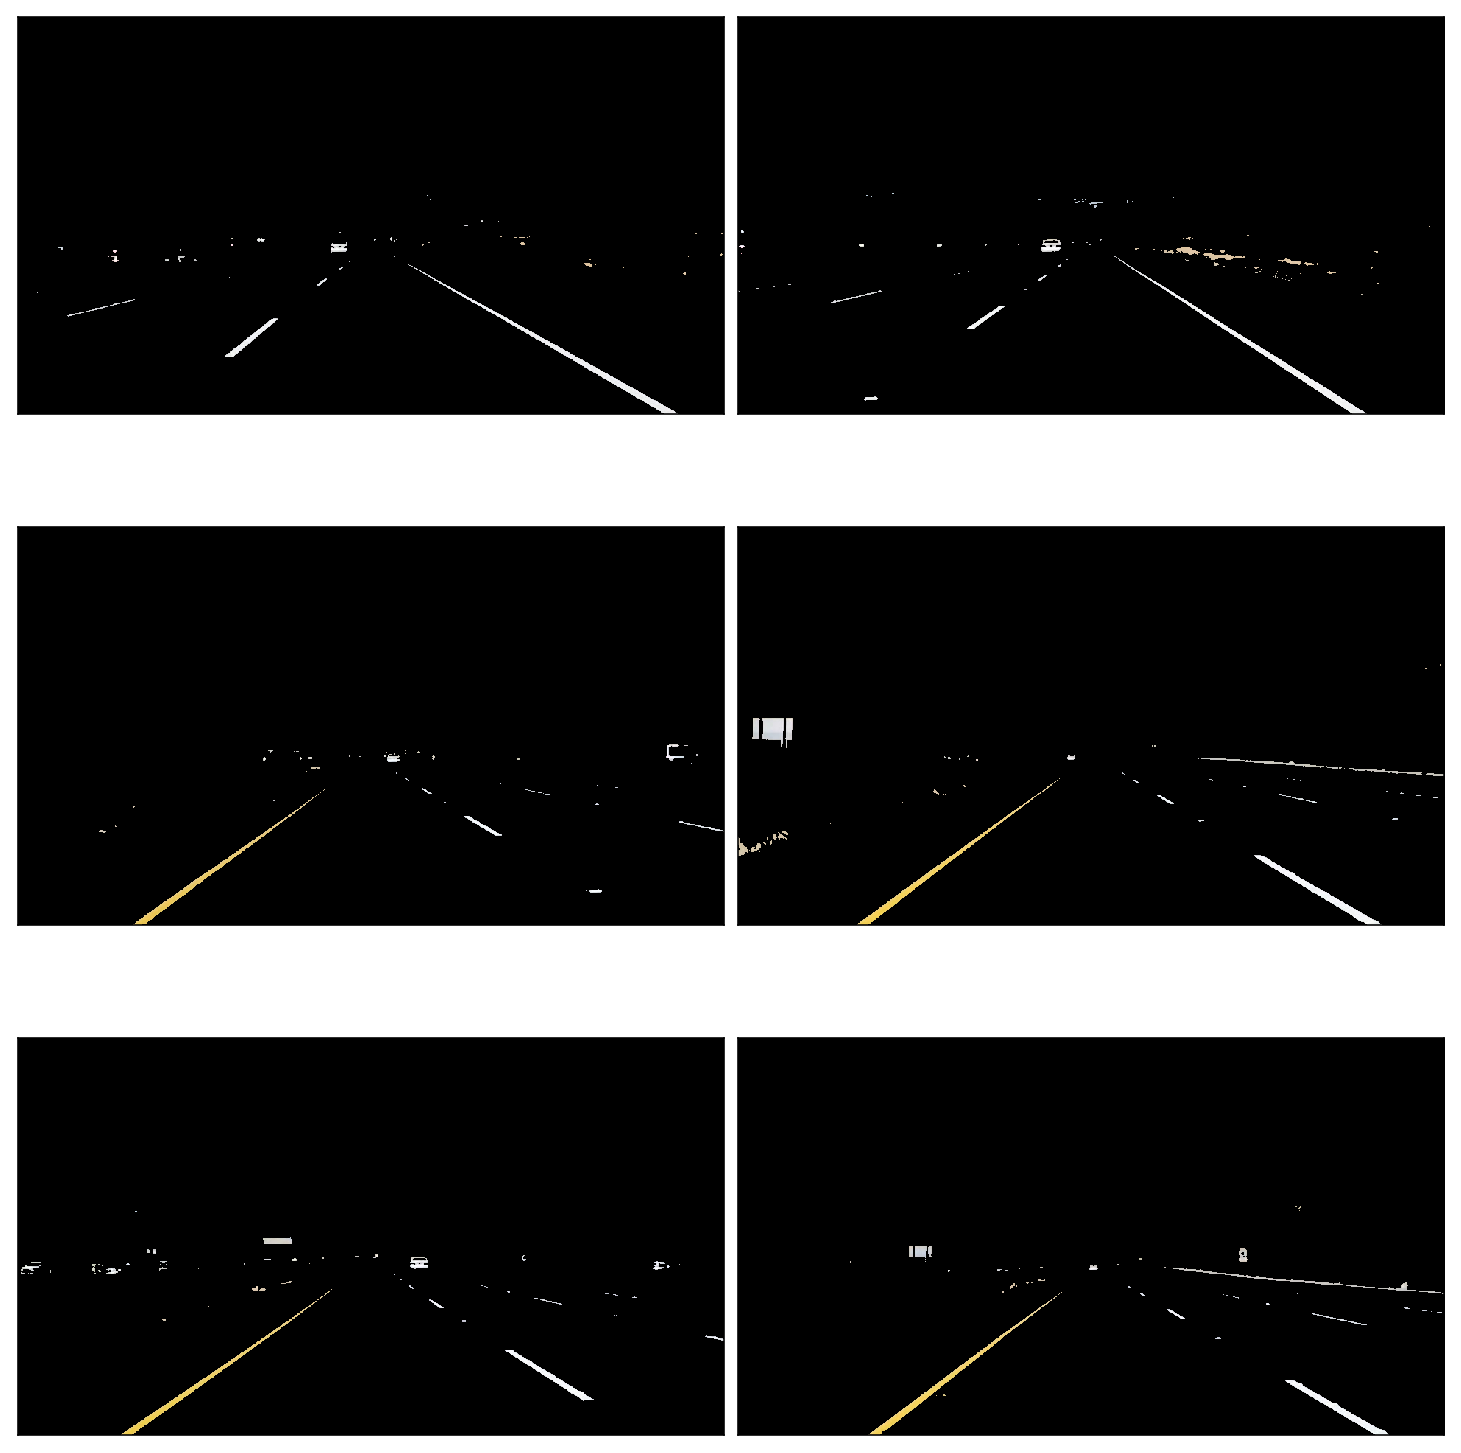

In [6]:
show_images(list(map(select_rgb_white_yellow, test_images)))

In [7]:
white_yellow_images = list(map(select_rgb_white_yellow, test_images))


## Canny Edge Detection



We want to detect edges in order to find straight lines especially lane lines.  For this, 

- use `cv2.cvtColor` to convert images into gray scale
- use `cv2.GaussianBlur` to smooth out rough edges 
- use `cv2.Canny` to find edges

Let's take a look at each step in details.




### Gray Scaling



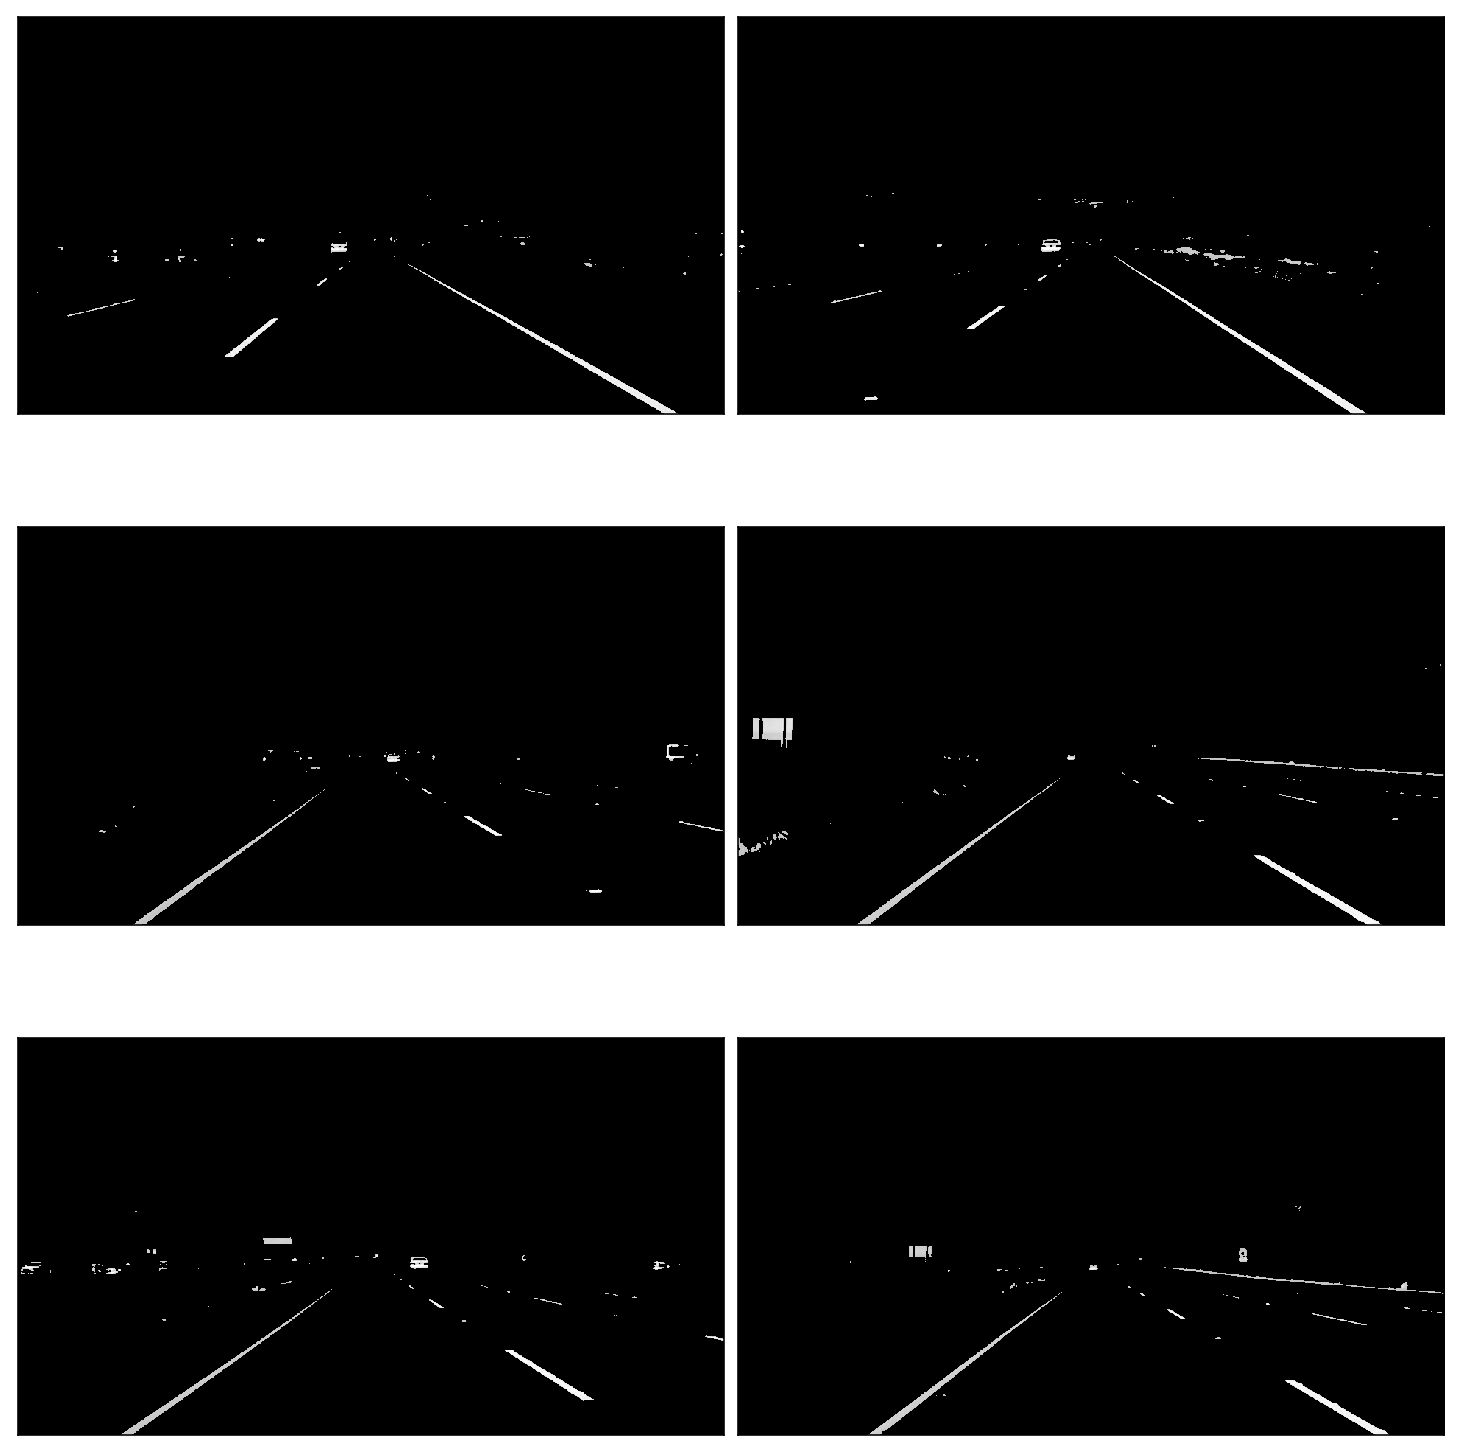

In [8]:
def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images = list(map(convert_gray_scale, white_yellow_images))

show_images(gray_images)

### Gaussian Smoothing 

We should make the edges smoother.  As you can see,  the above images have many rough edges which causes many noisy edges to be detected.

We will use `cv2.GaussianBlur` with kernel size of 15 inorder to smooth out edges.



In [9]:
def apply_smoothing(image, kernel_size=15):
    """
    kernel_size must be postivie and odd
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

### applying Smoothing on gray scale images 

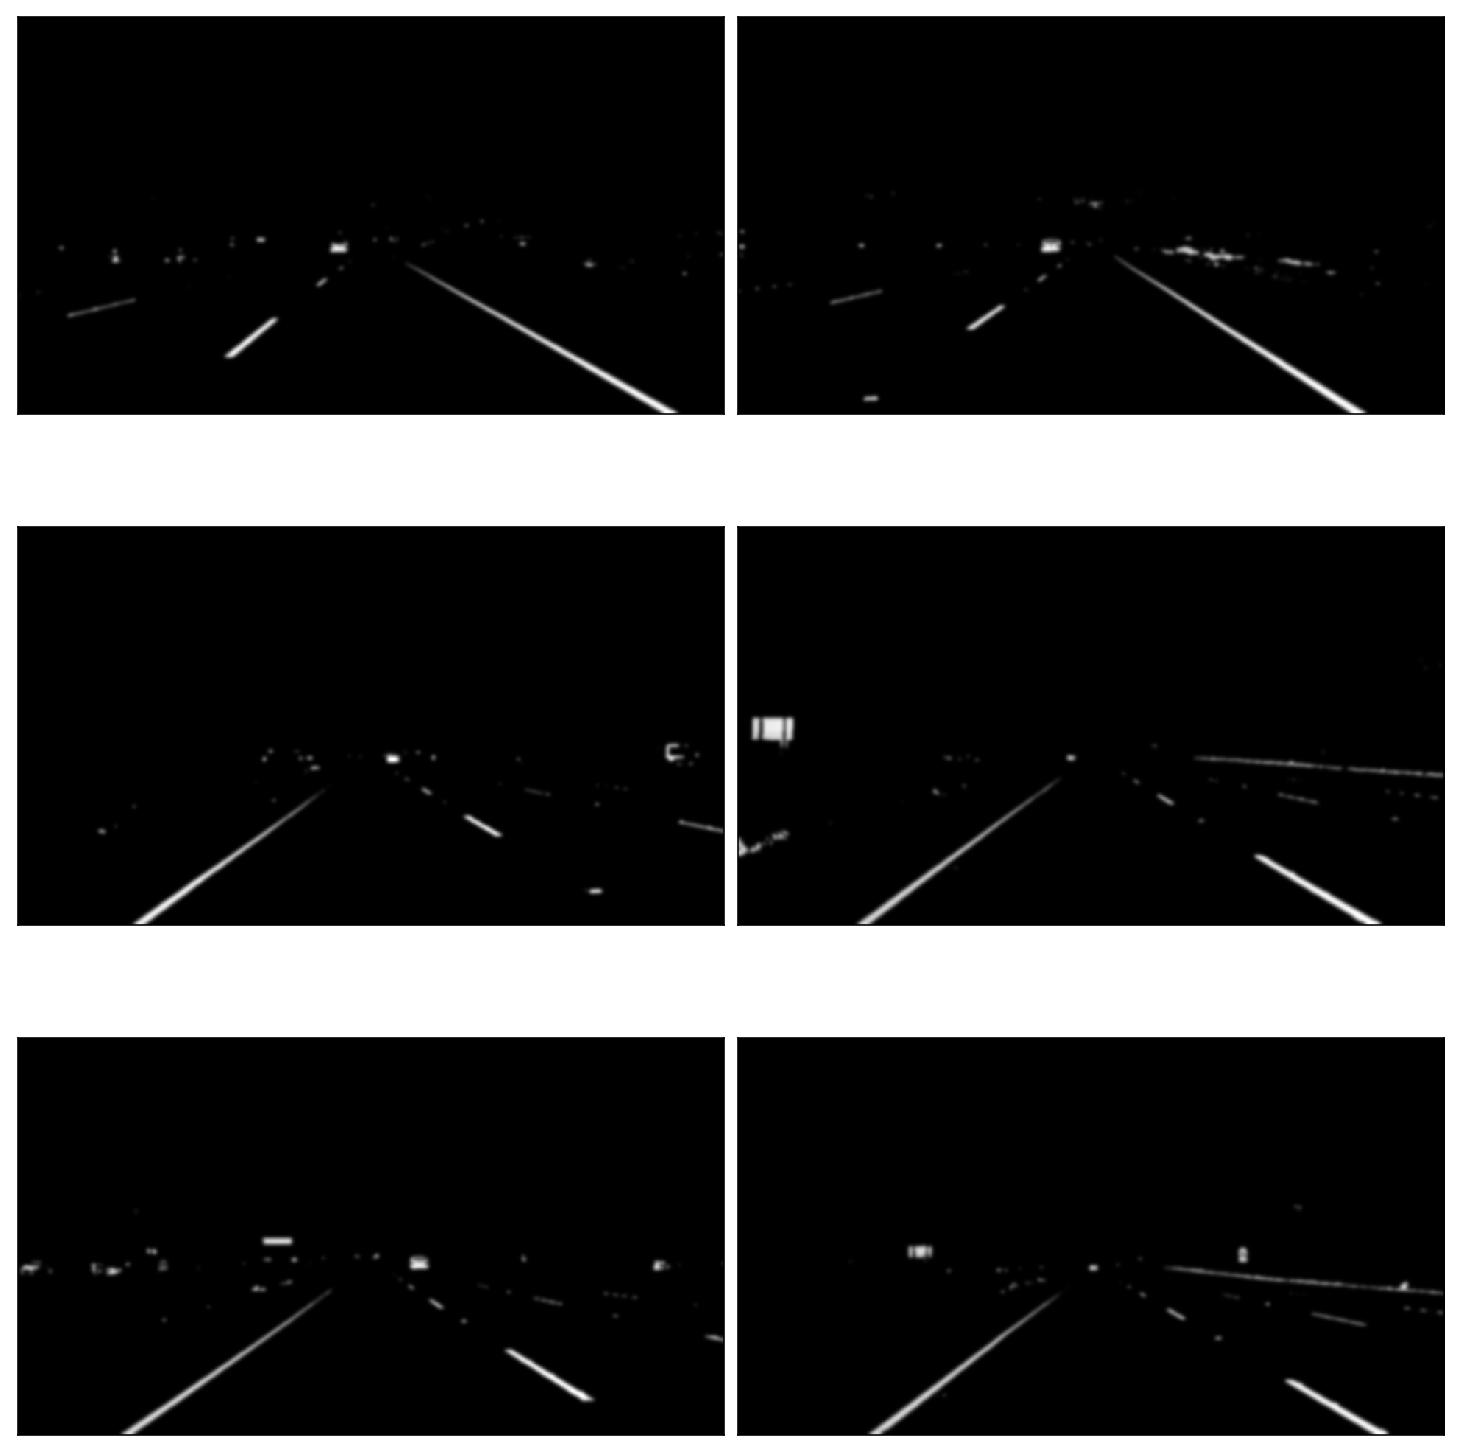

In [10]:
blurred_images = list(map(lambda image: apply_smoothing(image), gray_images))
show_images(blurred_images)

### Edge Detection

According to the OpenCV documentation `cv2.Canny` takes two threshold values which are used as follows:

- If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
- If a pixel gradient value is below the lower threshold, then it is rejected.
- If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.

These two threshold values are empirically determined.  Basically, you will need to define them by trials and errors.

I first set the `low_threshold` to zero and then adjust the `high_threshold`.   If `high_threshold` is too high, you find no edges.  If `high_threshold` is too low, you find too many edges.  Once you find a good `high_threshold`, adjust the `low_threshold` to discard the weak edges (noises) connected to the strong edges.


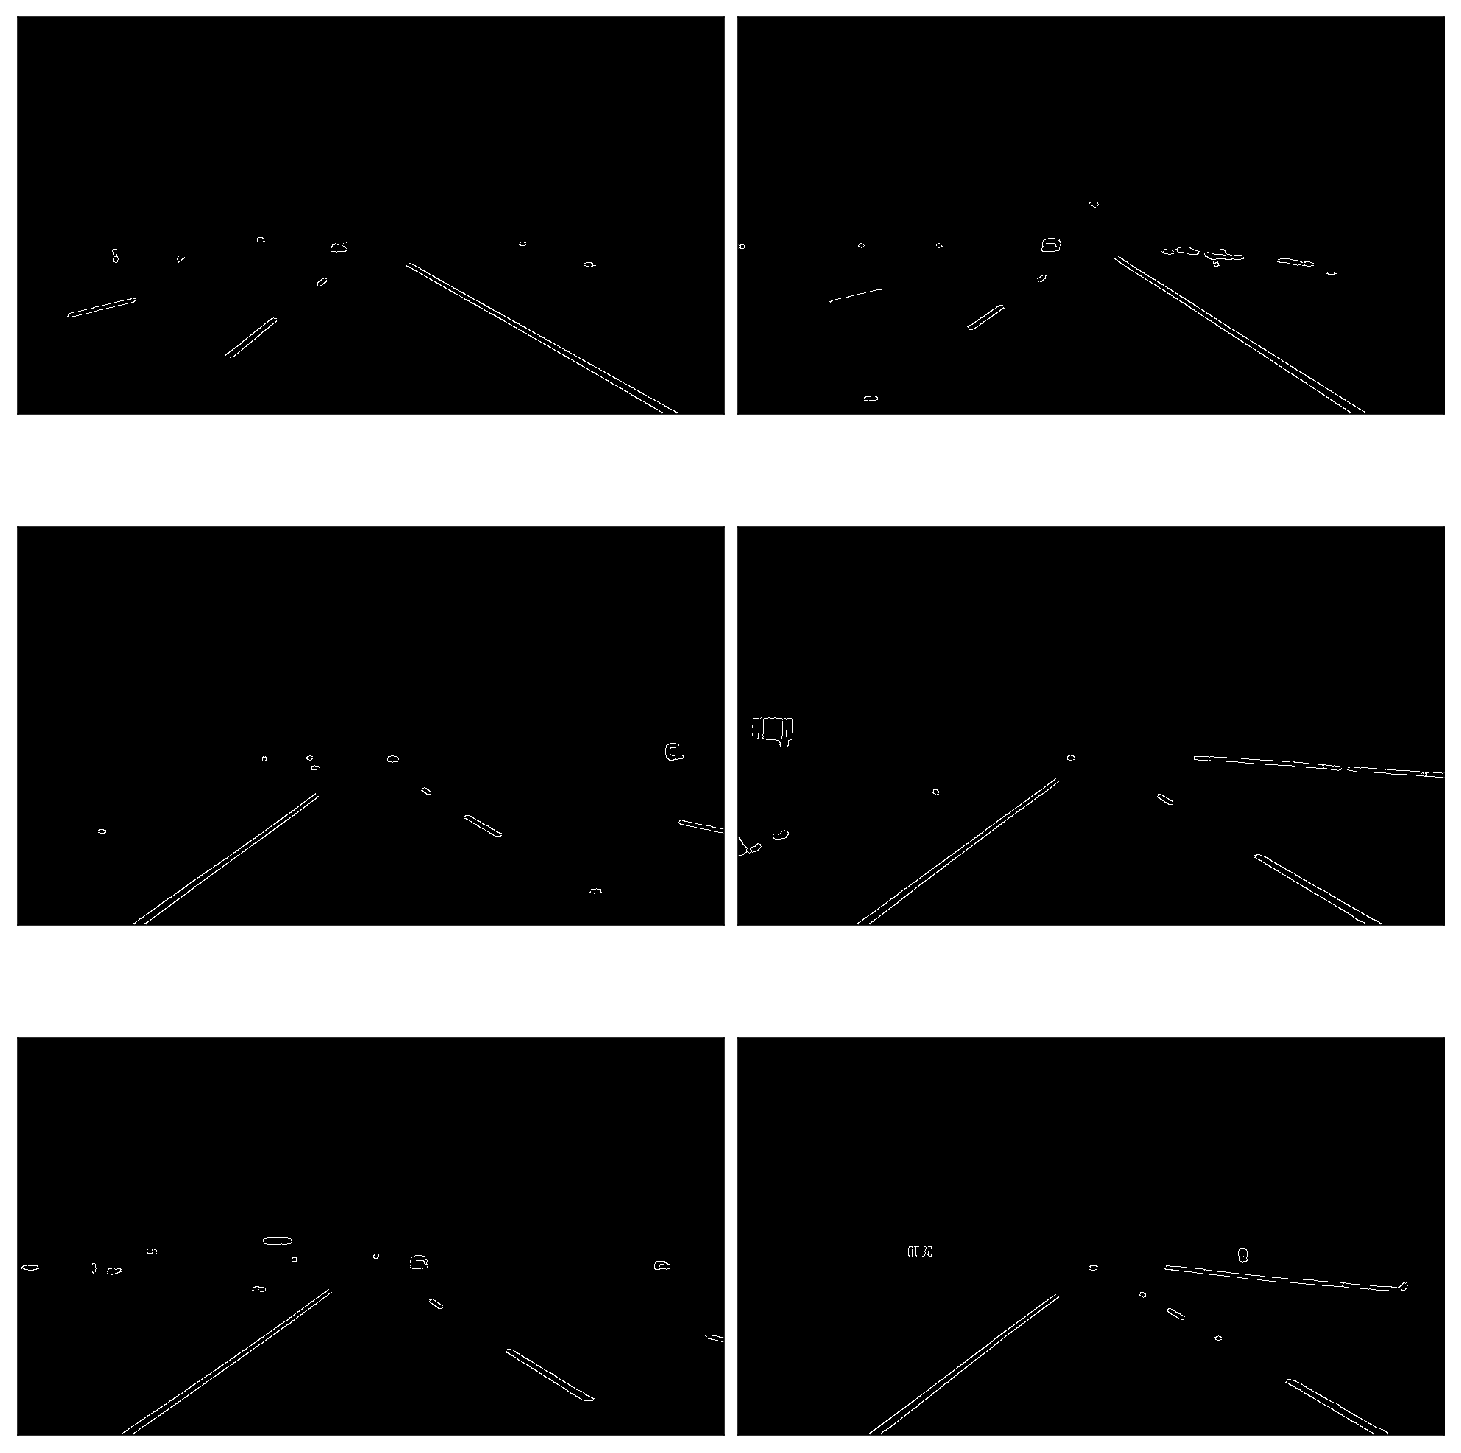

In [11]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

edge_images = list(map(lambda image: detect_edges(image), blurred_images))

show_images(edge_images)

## Region of Interest Selection

When finding lane lines, we don't need to check the sky and the hills.  

Roughly speaking, we are interested in the aread surrounded by the red lines below:

![Region of Interest](http://joe-schueller.github.io/img/region-of-interest.png)

So, we exclude outside the region of interest by apply a mask.



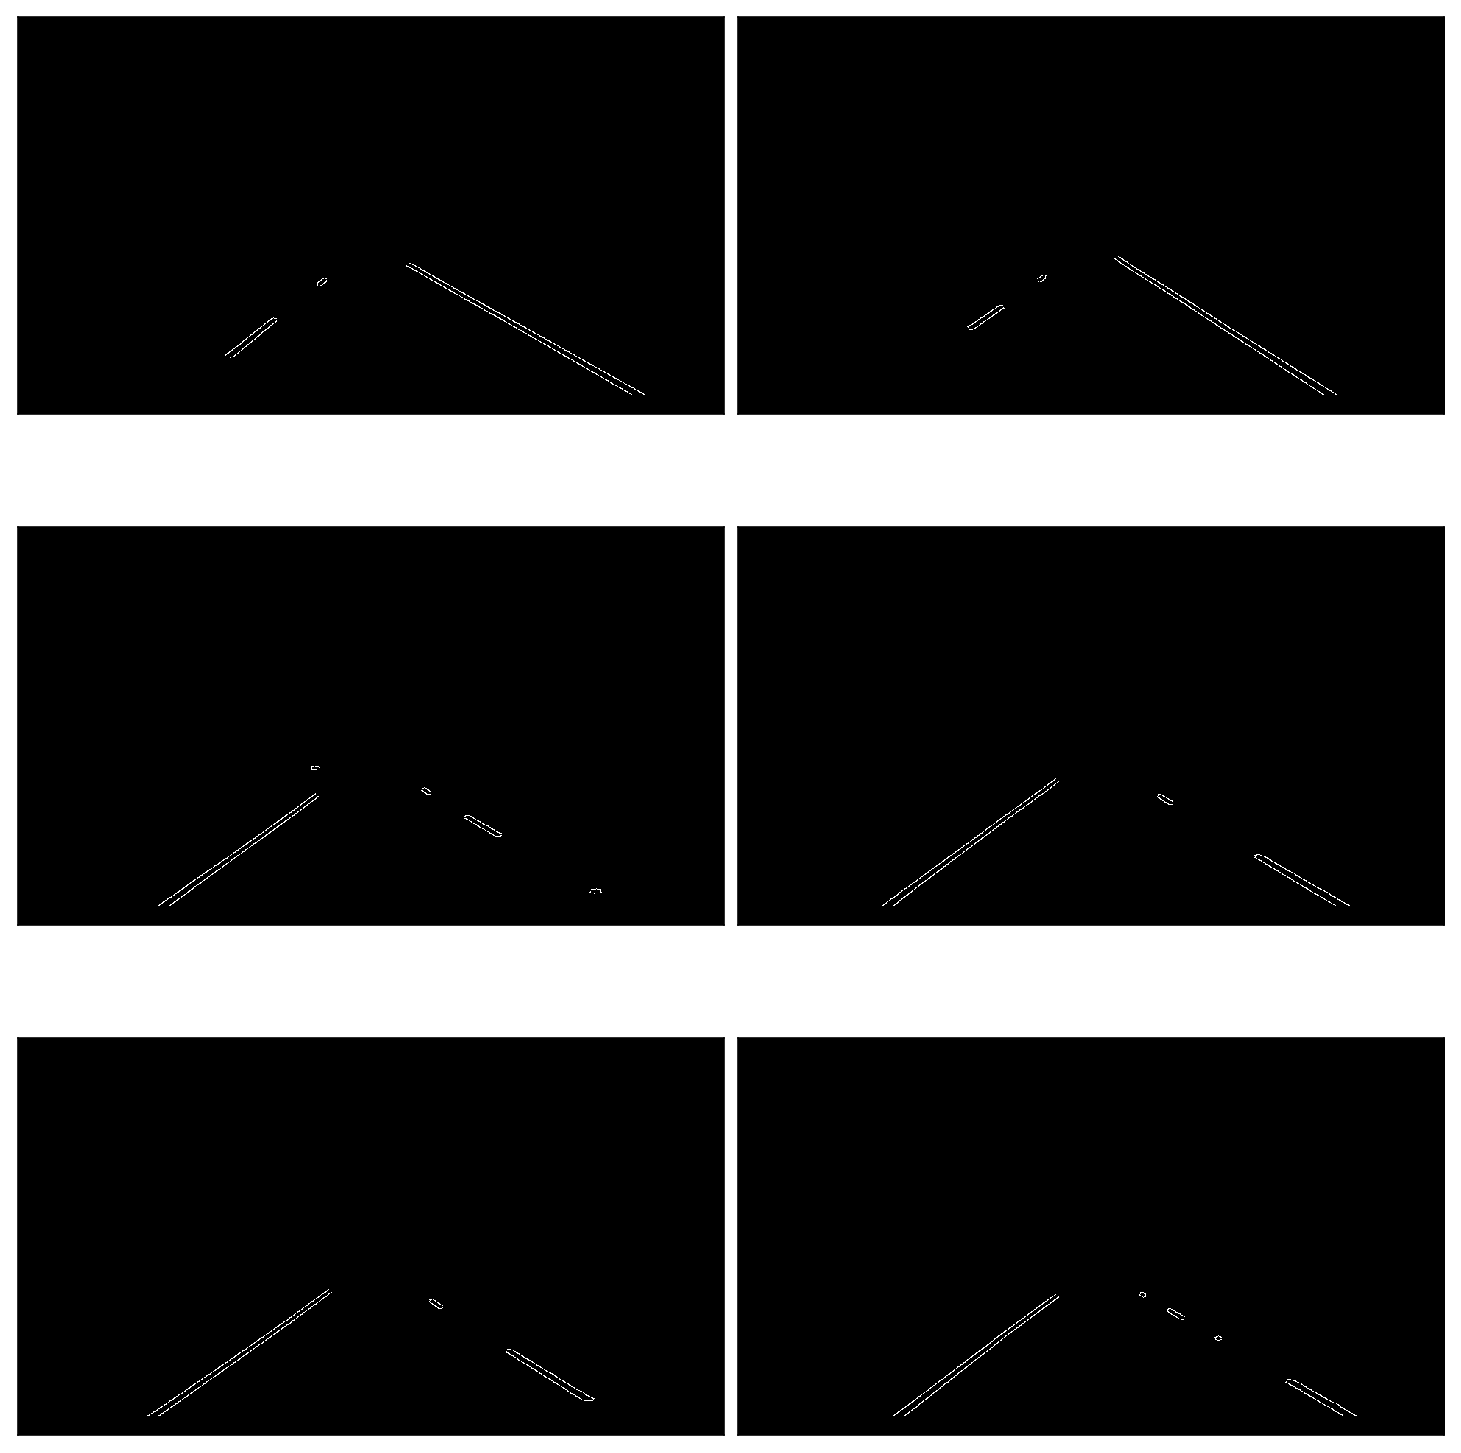

In [12]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    `vertices` should be a numpy array of integer points.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
    
def select_region(image):
    """
    It keeps the region surrounded by the `vertices` (i.e. polygon).  Other area is set to 0 (black).
    """
    # first, define the polygon by vertices
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.1, rows*0.95]
    top_left     = [cols*0.4, rows*0.6]
    bottom_right = [cols*0.9, rows*0.95]
    top_right    = [cols*0.6, rows*0.6] 
    # the vertices are an array of polygons (i.e array of arrays) and the data type must be integer
    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return region_of_interest(image, vertices)


# images showing the region of interest only
roi_images = list(map(select_region, edge_images))

show_images(roi_images)

Now we have lane lines but we need to recognize them as lines.  Especially, two lines: the left lane and the right lane.

## Hough Transform Line Detection

Using `cv2.HoughLinesP` to detect lines in the edge images.

There are several parameters to tweak and tune:

- rho – Distance resolution of the accumulator in pixels.
- theta – Angle resolution of the accumulator in radians.
- threshold – Accumulator threshold parameter. Only those lines are returned that get enough votes (> `threshold`).
- minLineLength – Minimum line length. Line segments shorter than that are rejected.
- maxLineGap – Maximum allowed gap between points on the same line to link them.

We will give a wrapper to `cv2.HoughLinesP`  which output  a list of detected lines(each line represented by two points). 

In [13]:
def hough_lines(image):
    """
    `image` should be the output of a Canny transform.
    
    Returns hough lines (not the image with lines)
    """
    return cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)


list_of_lines = list(map(hough_lines, roi_images))

`list_of_lines` contains a list of lines detected, Let's draw the lines onto the original images.  

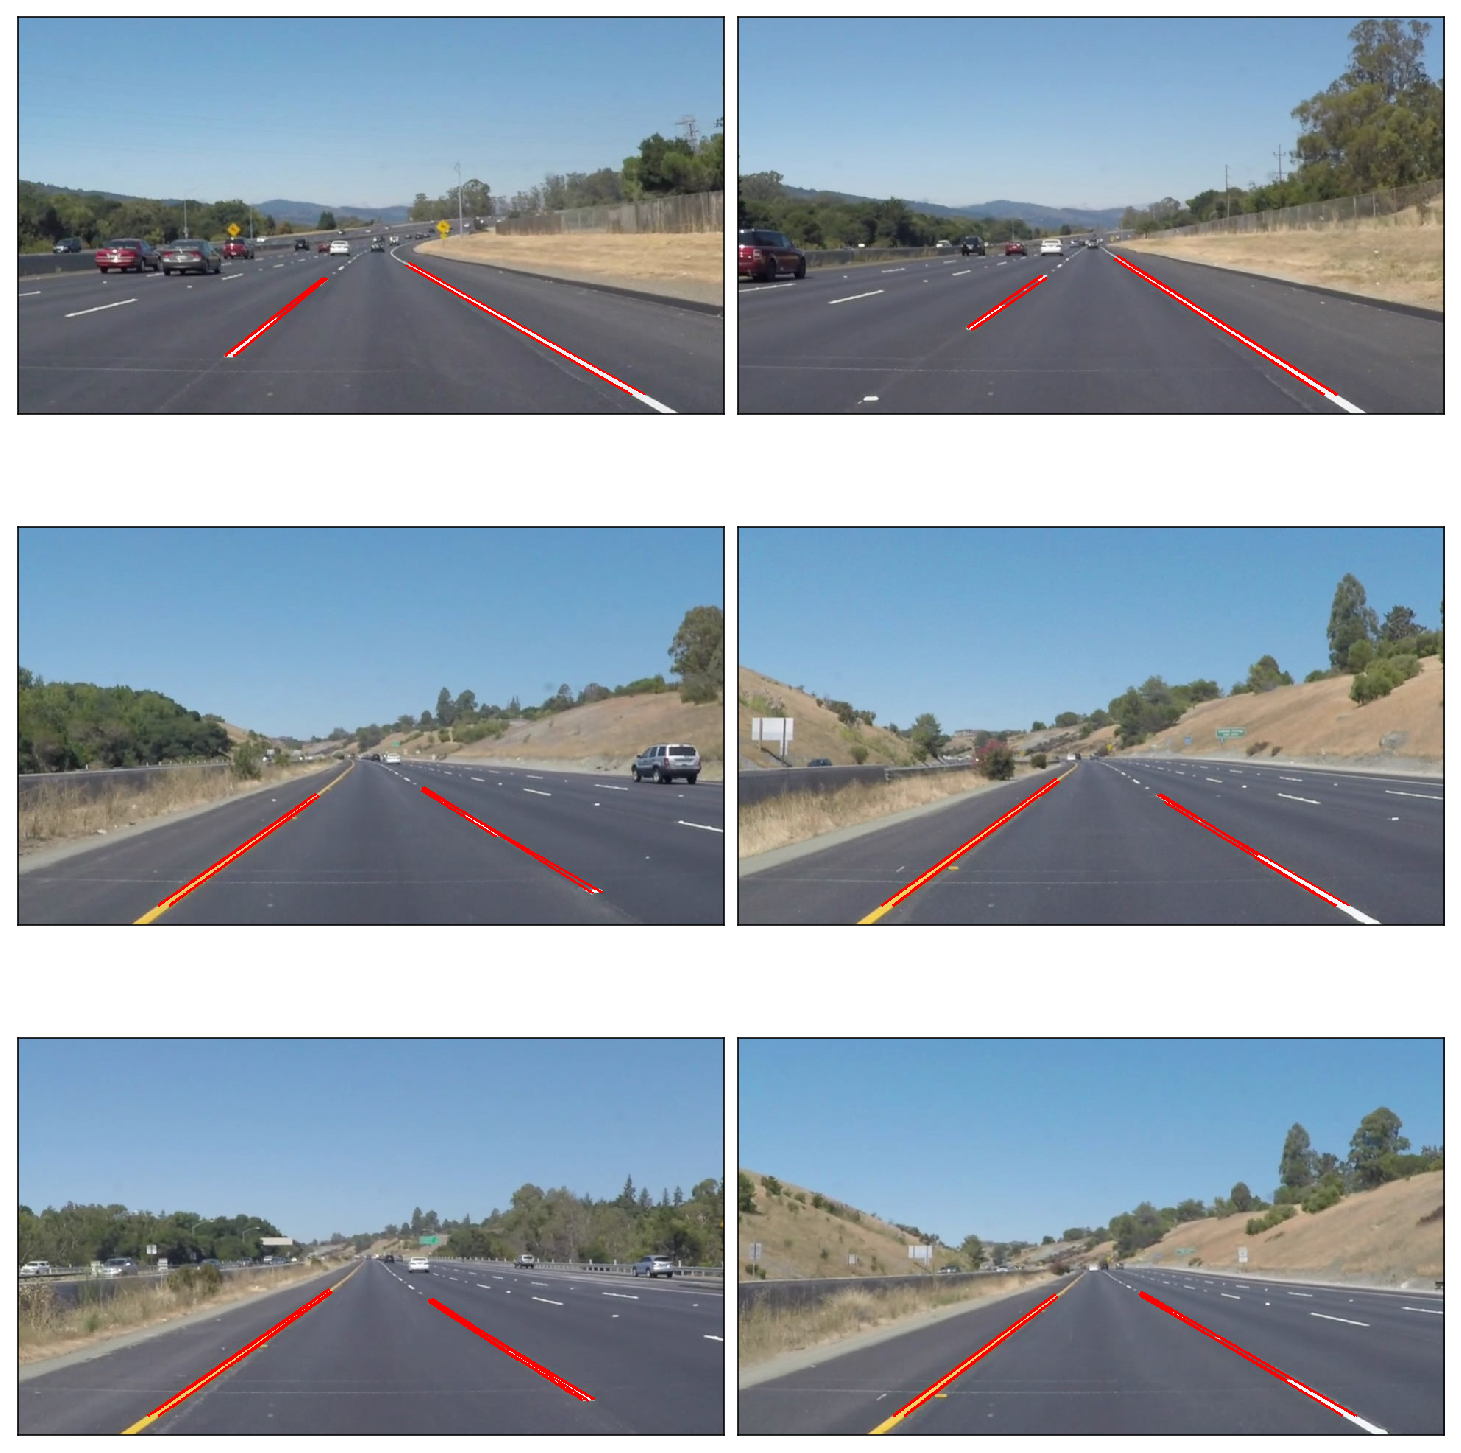

In [14]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=2, make_copy=True):
    # the lines returned by cv2.HoughLinesP has the shape (-1, 1, 4)
    if make_copy:
        image = np.copy(image) # don't want to modify the original
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image


line_images = []
for image, lines in zip(test_images, list_of_lines):
    line_images.append(draw_lines(image, lines))
    
show_images(line_images)

### Averaging and Extrapolating Lines

There are multiple lines detected for a lane line.  We should come up with an averaged line for that.

Also, some lane lines are only partially recognized.  We should extrapolate the line to cover full lane line length.

We want two lane lines: one for the left and the other for the right.  The left lane should have a positive slope, and the right lane should have a negative slope.  Therefore, we'll collect positive slope lines and negative slope lines separately and take averages.


#### Lines ->Lanes

In [15]:
def average_slope_intercept(lines):
    left_lines    = [] # (slope, intercept)
    left_weights  = [] # (length,)
    right_lines   = [] # (slope, intercept)
    right_weights = [] # (length,)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2==x1:
                continue # ignore a vertical line
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            length = np.sqrt((y2-y1)**2+(x2-x1)**2)
            if slope < 0: # y is reversed in image
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    
    # add more weight to longer lines    
    left_lane  = np.dot(left_weights,  left_lines) /np.sum(left_weights)  if len(left_weights) >0 else None
    right_lane = np.dot(right_weights, right_lines)/np.sum(right_weights) if len(right_weights)>0 else None
    
    return left_lane, right_lane # (slope, intercept), (slope, intercept)

נעזרתי



Using the above `average_lines` function, we can calculate average slope and intercept for the left and right lanes of each image.  We still need to convert the slope and intercept into pixel points Let's define functions to help us with that.

In [16]:
def make_line_points(y1, y2, line):
    """
    Convert a line represented in slope and intercept into pixel points
    """
    if line is None:
        return None
    
    slope, intercept = line
    
    # make sure everything is integer as cv2.line requires it
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    
    return ((x1, y1), (x2, y2))

def lane_lines(image, lines):
    left_lane, right_lane = average_slope_intercept(lines)
    
    y1 = image.shape[0] # bottom of the image
    y2 = y1*0.6         # slightly lower than the middle

    left_line  = make_line_points(y1, y2, left_lane)
    right_line = make_line_points(y1, y2, right_lane)
    
    return left_line, right_line


### Redefining draw_lines function

Our `draw_lines` except a list of lines as the second parameter.  Each line is a list of 4 values (x1, y1, x2, y2).  The data type needs to be integer for `cv2.line` to work without throwing an error.


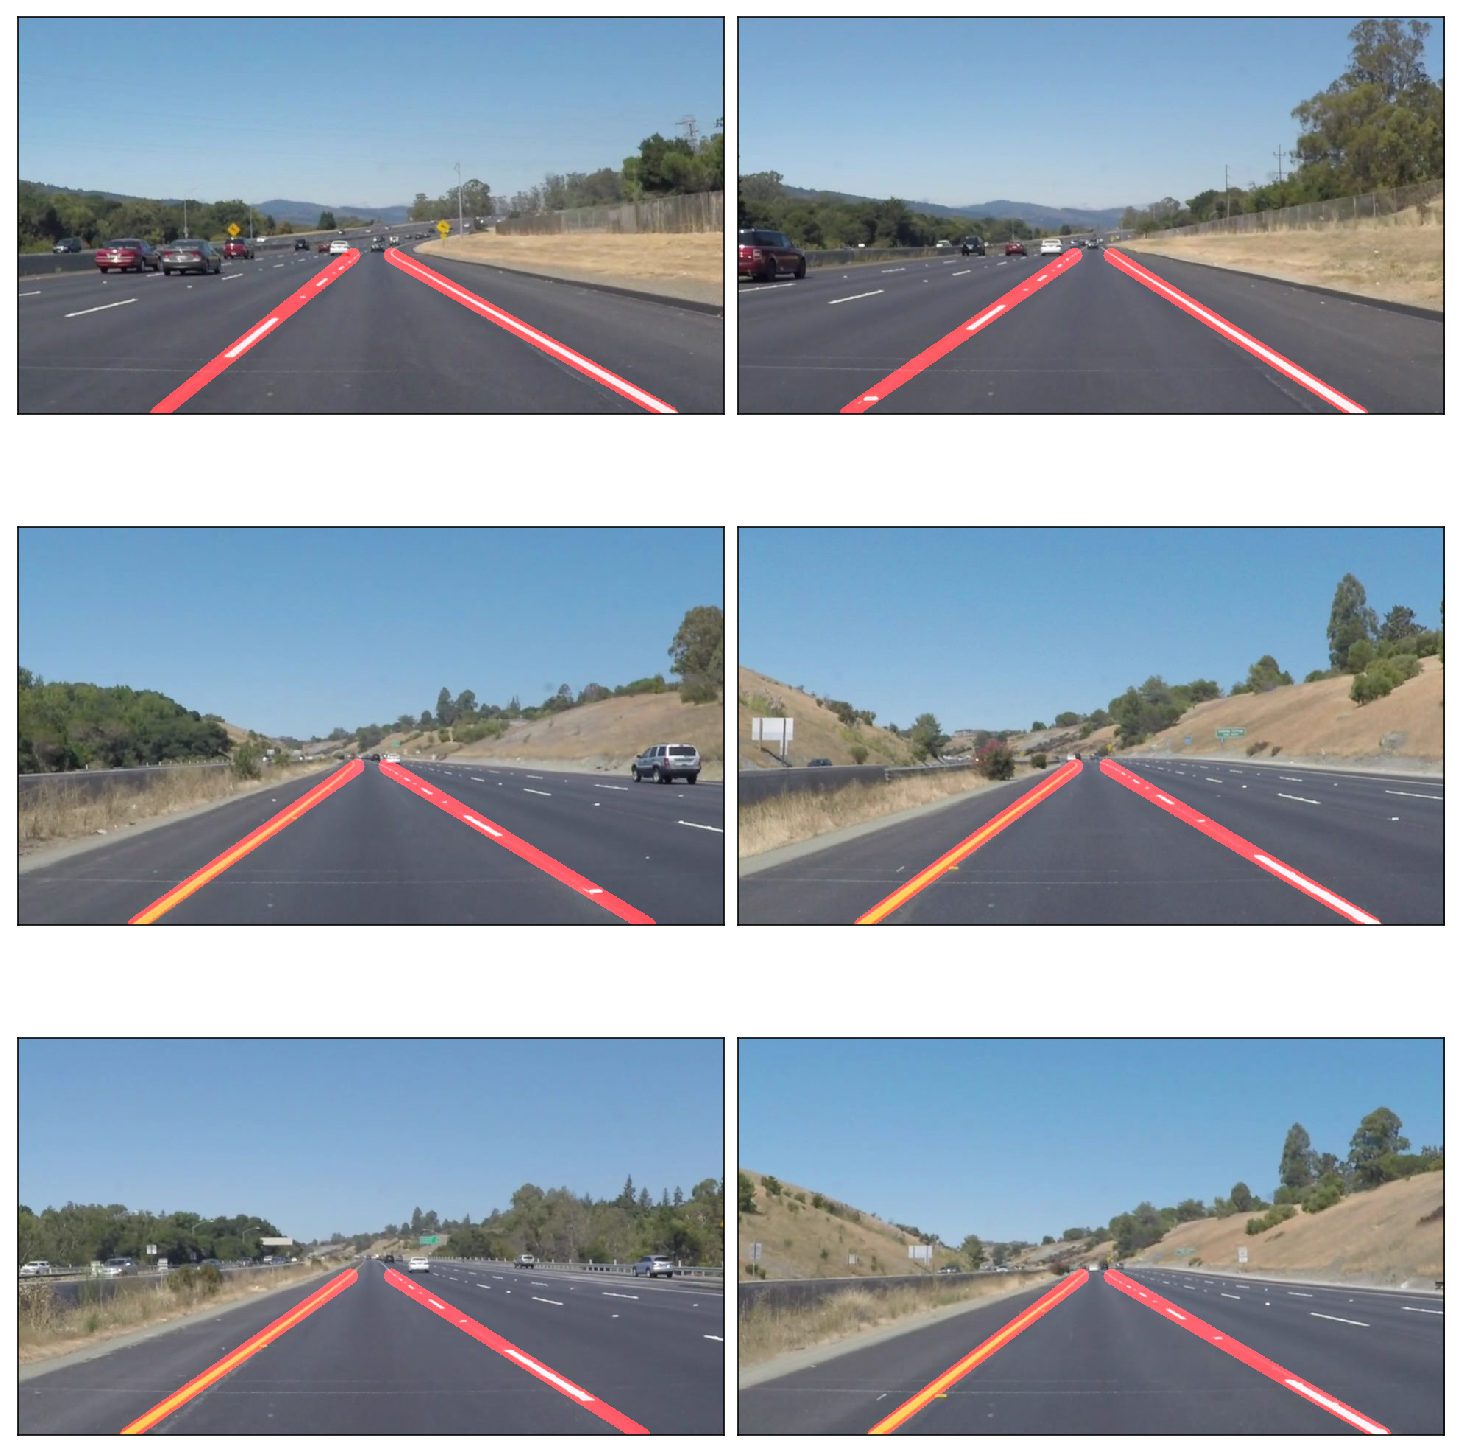

In [17]:

    
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=20):
    # make a separate image to draw lines and combine with the orignal later
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    # image1 * α + image2 * β + λ
    # image1 and image2 must be the same shape.
    return cv2.addWeighted(image, 1.0, line_image, 0.95, 0.0)
             
    
lane_images = []
for image, lines in zip(test_images, list_of_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))

    
show_images(lane_images)

## Video Clips



In [23]:
from collections import deque
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

QUEUE_LENGTH=50

class LaneDetector:
    def __init__(self):
        self.left_lines  = deque(maxlen=QUEUE_LENGTH)
        self.right_lines = deque(maxlen=QUEUE_LENGTH)

    def process(self, image):
        white_yellow = select_rgb_white_yellow(image)
        gray         = convert_gray_scale(white_yellow)
        smooth_gray  = apply_smoothing(gray)
        edges        = detect_edges(smooth_gray)
        regions      = select_region(edges)
        lines        = hough_lines(regions)
        left_line, right_line = lane_lines(image, lines)

        def mean_line(line, lines):
            if line is not None:
                lines.append(line)

            if len(lines)>0:
                line = np.mean(lines, axis=0, dtype=np.int32)
                line = tuple(map(tuple, line)) # make sure it's tuples not numpy array for cv2.line to work
            return line

        left_line  = mean_line(left_line,  self.left_lines)
        right_line = mean_line(right_line, self.right_lines)

        return draw_lane_lines(image, (left_line, right_line))

def process_video(video_input, video_output):
    detector = LaneDetector()

    clip = VideoFileClip(os.path.join('test_videos', video_input))
    processed = clip.fl_image(detector.process)
    processed.write_videofile(os.path.join('test_videos_output', video_output), audio=False)

### solidWhiteRight.mp4

In [21]:
%time process_video('solidWhiteRight.mp4', 'white.mp4')    

[MoviePy] >>>> Building video test_videos_output\white.mp4
[MoviePy] Writing video test_videos_output\white.mp4


100%|███████████████████████████████████████████████████████████████████████████████▋| 221/222 [00:02<00:00, 85.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output\white.mp4 

Wall time: 2.97 s


In [24]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('test_videos_output\white.mp4'))

### solidYellowLeft.mp4

In [25]:
%time process_video('solidYellowLeft.mp4', 'yellow.mp4')

[MoviePy] >>>> Building video test_videos_output\yellow.mp4
[MoviePy] Writing video test_videos_output\yellow.mp4


100%|███████████████████████████████████████████████████████████████████████████████▉| 681/682 [00:08<00:00, 84.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output\yellow.mp4 

Wall time: 8.41 s


In [26]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('test_videos_output\yellow.mp4'))

### challenge.mp4

In [27]:
%time process_video('challenge.mp4', 'challenge.mp4')

[MoviePy] >>>> Building video test_videos_output\challenge.mp4
[MoviePy] Writing video test_videos_output\challenge.mp4


100%|████████████████████████████████████████████████████████████████████████████████| 251/251 [00:05<00:00, 45.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output\challenge.mp4 

Wall time: 6.1 s


In [30]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('test_videos_output\challenge.mp4'))